# Titanic - Machine Learning from Disaster

[Reference: Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

0. Setting
    0. Install Packages
    1. Basic Packages
    2. Visualization
    3. Modeling
1. Data
    1. Import Data
    2. EDA
        1. Distribution Check
        2. Missing Value Check
    3. Data Preprocessing
        1. Feature Engineering
        2. Missing and Outlier Handling
        3. Correlation Check
2. Model
    1. Model Selection
    2. Model Training
    3. Model Evaluation
3. Inference
    1. Inference
    2. Ensemble/Stacking
4. Submission
    1. Submission
    2. Leaderboard

In [ ]:
# 0. Setting
# 0.0. Install packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [1]:
# 0. Setting
# 0.1. Basic Packages
import pandas as pd
import numpy as np

# 0.2. Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 0.3. Modeling
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 1. Data
# 1.1. Import Data
train_df = pd.read_csv('./data/train.csv', )
test_df = pd.read_csv('./data/test.csv')

# Checing the size ((891, 12), (418, 11))
train_df.shape, test_df.shape

# Columns ~ ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#            'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_df.columns

# Check data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check types > Categorical / Numerical
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

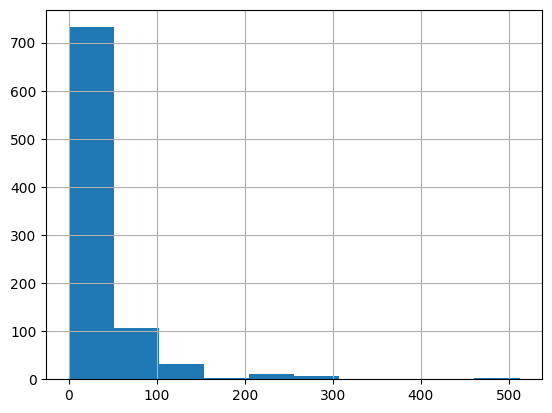

In [5]:
# 2. EDA
# 2.1. Distribution Check
train_df.describe()

'''
Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224). Check!
Survived is a categorical feature with 0 or 1 values. Check!
Around 38% samples survived representative of the actual survival rate at 32%. Check!
Most passengers (> 75%) did not travel with parents or children. Check!
Nearly 30% of the passengers had siblings and/or spouse aboard. Check!
Fares varied significantly with few passengers (<1%) paying as high as $512. Check!
Few elderly passengers (<1%) within age range 65-80. Check!
'''

# train_df['Age'].hist()
train_df['Fare'].hist()

In [6]:
# Check Categorical features
train_df.describe(include = ['O'])

# Name unique 871
train_df['Name'].nunique()
# Sex male 577, female 314
train_df['Sex'].value_counts()
# Cabin ~ Null
train_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [21]:
train_df['Embarked'].value_counts()
train_df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [20]:
# Categorical ~ Survived, Sex, and Embarked. Ordinal: Pclass.
train_df['PassengerId'] = train_df['PassengerId'].astype('category')
test_df['PassengerId'] = test_df['PassengerId'].astype('category')
'Survived'
'Pclass'
'Name'
'Sex'
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male':0}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male':0}).astype(int)

'Ticket'
'Cabin'
'Embarked'
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

# Numerical ~ Age, Fare. Discrete: SibSp, Parch.
'Age'
'Fare'
'SibSp'
'Parch'

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [8]:
# 2.2. Missing Value Check
train_df.info()
# There are missing values in Cabin, Age, Embarked
train_df['Cabin'].head()
for i in train_df.columns:
    print(i, train_df[i].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 117.7+ KB
PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [9]:
# Group by Check
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [13]:
# 3. Data Preprocessing

# 3.1. Feature Engineering
# Age correlated with survival
# PassengerId, Name, Ticket, Cabin drop
# Family feature creation
# Women, Children, High-class survival

# Drop
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [28]:
# 3.2. Missing and Outlier Handling
train_df = train_df.drop(['Name', 'Embarked'], axis=1)
test_df = test_df.drop(['Name', 'Embarked'], axis=1)
train_df.head()
train_df.info()

KeyError: "['Name', 'Embarked'] not found in axis"

In [40]:
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

In [50]:
train_df.info()
train_df['Age'].mean()
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].mean())

train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [51]:
# 4. Modeling
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [52]:
# test_df.columns
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 18.1 KB


In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [54]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.01

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.24

In [57]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

73.85

In [58]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\AI.Public\AppData\Local\anaconda3\envs\kaggle_titanic\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AI.Public\AppData\Local\anaconda3\envs\kaggle_titanic\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


75.42

In [59]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.73

In [60]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [61]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
1,KNN,83.95
2,Logistic Regression,79.80
4,Naive Bayes,79.24
7,Linear SVC,75.42
5,Perceptron,73.85
6,Stochastic Gradient Decent,72.73
0,Support Vector Machines,68.01
